In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score

In [2]:
# data = 'wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
# !wget $data

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
remove = ['default', 'loan']

df = df.drop(remove, axis = 1)

In [6]:
df.shape

(45211, 15)

In [7]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [11]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

### Question 1

In [12]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Question 2

In [13]:
df[numerical].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

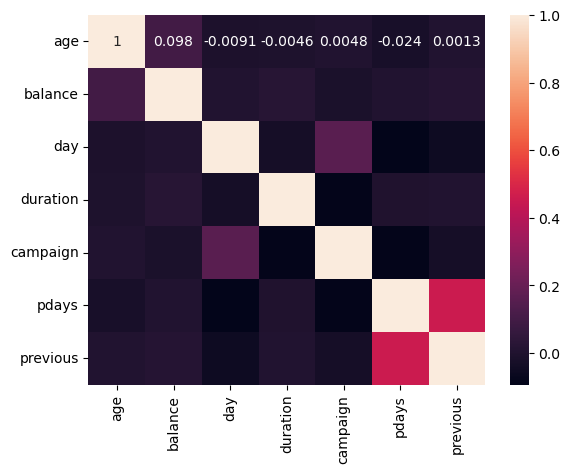

In [14]:
sns.heatmap(df[numerical].corr(), annot=True)

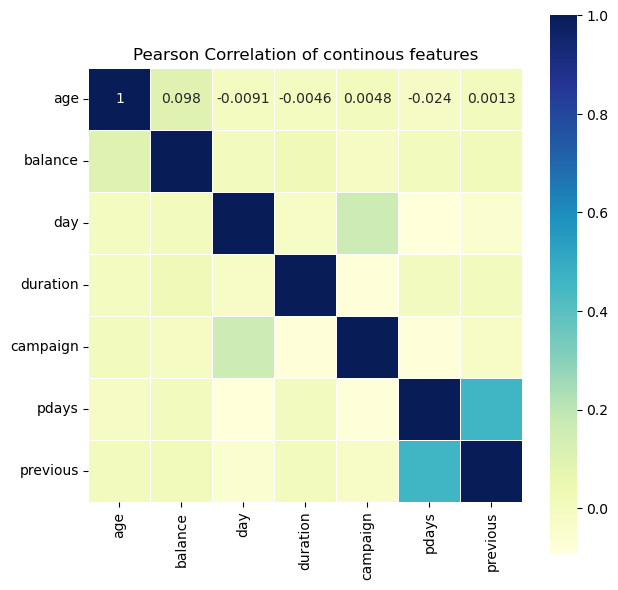

In [15]:
# plot the heatmap showing calculated correlations
plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(df.corr(), 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                )

#### Observation: Age and balance are the most correlating

### Target encoding

In [16]:
#convert to numbers

df.y = (df.y == 'yes').astype(int)

In [17]:
df.y.dtypes

dtype('int32')

### Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size = 0.2) #, random_state = 42

In [20]:
print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}')

lenght of full train is 36168,
lenght of test is 9043


In [21]:
# further divide the full train to obtain 20 percent for the validation
# 25% of 80% is 20% of the original dataset length

df_train, df_val = train_test_split(df_full_train, test_size = 0.25) #, random_state = 42

print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}\n'
      f'length of validation is {len(df_val)}')

lenght of full train is 36168,
lenght of test is 9043
length of validation is 9042


In [22]:
df_full_train.head(3)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27558,37,technician,married,secondary,807,yes,cellular,21,nov,634,4,-1,0,unknown,0
21389,49,blue-collar,married,secondary,1350,no,cellular,18,aug,22,2,-1,0,unknown,0
43017,26,unemployed,single,secondary,632,no,cellular,12,feb,218,1,-1,0,unknown,1


In [23]:
# reset index because the elements are now shuffled

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [24]:
# target values

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [25]:
#Delet churn variable from the data frame

del df_train['y']
del df_val['y']
del df_test['y']

### Question 3 Mutual information

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
# we can use Apply

series = ['contact', 'education', 'housing', 'poutcome']


def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.y, series)

df_full_train[series].apply(mutual_info_churn_score)

contact      0.013224
education    0.002380
housing      0.009301
poutcome     0.030100
dtype: float64

In [28]:
mutual_info_score(df_full_train.y, df_full_train.contact )

0.013224047617939647

In [29]:
mutual_info_score(df_full_train.y, df_full_train.education )

0.002380308502847154

In [30]:
mutual_info_score(df_full_train.y, df_full_train.housing )

0.009300892150881035

In [31]:
mutual_info_score(df_full_train.y, df_full_train.poutcome )

0.03010027607264658

#### observation: poutcome has the highest mutual information score

### Categorical encoding

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records') 
train_dict[0]

{'job': 'services',
 'marital': 'single',
 'education': 'secondary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'apr',
 'poutcome': 'other',
 'age': 34,
 'balance': 194,
 'day': 15,
 'duration': 149,
 'campaign': 1,
 'pdays': 268,
 'previous': 2}

In [34]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dict)

X_train.shape

(27126, 47)

In [35]:
#Vectorise validation set

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 47)

### Question 4

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [38]:
model.intercept_[0]

-0.9652996637685987

In [39]:
model.coef_[0]#.shape

array([-3.64295785e-03,  1.28827054e-05, -7.83810691e-02,  2.47080467e-01,
        1.59485278e-01, -1.37186541e+00,  1.17055881e-02,  4.38647807e-03,
       -4.09149569e-01, -3.21008903e-01, -6.81698603e-02, -1.66971331e-01,
       -1.47871722e-01, -8.17427942e-01,  1.79957101e-02, -2.90405738e-01,
       -4.21056594e-01, -3.63907613e-01, -1.80101046e-01,  5.08010612e-01,
       -3.39677200e-01, -1.87684774e-01,  4.16092452e-01, -1.19522194e-01,
       -3.10512719e-03, -1.93815183e-03, -3.70760605e-01, -4.16026766e-01,
       -1.78512293e-01, -9.92757901e-02, -7.91759880e-01,  3.84070939e-01,
       -2.95230296e-01, -1.28482747e+00, -9.66946483e-01,  3.16674437e-01,
        1.52410350e+00, -5.01538129e-01, -9.27043107e-01,  8.82684658e-01,
        7.93787954e-01, -2.81789051e-04, -8.14315508e-01, -7.17675863e-01,
        1.56410160e+00, -9.97409889e-01,  3.40450605e-03])

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]

In [41]:
y_pred

array([0.03186824, 0.28239189, 0.04889966, ..., 0.07239295, 0.01763667,
       0.03967656])

In [42]:
y_decision = (y_pred >= 0.5)

In [43]:
y_pred_all = (y_decision == y_val).mean()
y_pred_all.round(2)

0.9

### Feature elimation

In [44]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

#### NO AGE

In [45]:
# Remove Age
#print(numerical)

del numerical[0]
numerical

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [46]:
train_no_age = df_train[categorical + numerical].to_dict(orient = 'records') 


In [47]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_age)

X_train.shape

(27126, 46)

In [48]:
#Vectorise validation set

val_no_age = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_age)

X_val.shape

(9042, 46)

In [49]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [50]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03536857, 0.27913212, 0.04982271, ..., 0.07303011, 0.017919  ,
       0.0386565 ])

In [51]:
y_pred_no_age = (y_pred >= 0.5)

In [52]:
acc_no_age = (y_pred_no_age == y_val).mean()
acc_no_age#.round(2)

0.900353904003539

#### NO BALANCE

In [53]:
# Remove Bakance
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del numerical[1]
numerical

['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [54]:
train_no_balance = df_train[categorical + numerical].to_dict(orient = 'records') 


In [55]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_balance)

X_train.shape

(27126, 46)

In [56]:
#Vectorise validation set

val_no_age = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 46)

In [57]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [58]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03297149, 0.27607548, 0.04861163, ..., 0.07451495, 0.01773322,
       0.03961322])

In [59]:
y_pred_no_bal = (y_pred >= 0.5)

In [60]:
acc_no_bal = (y_pred_no_bal == y_val).mean()
acc_no_bal#.round(2)

0.8999115239991152

#### NO MARITAL

In [61]:
# Remove Marital
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del categorical[1]
categorical

['job', 'education', 'housing', 'contact', 'month', 'poutcome']

In [62]:
train_no_marital = df_train[categorical + numerical].to_dict(orient = 'records') 


In [63]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_marital)

X_train.shape

(27126, 44)

In [64]:
#Vectorise validation set

val_no_marital = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_marital)

X_val.shape

(9042, 44)

In [65]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [66]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03169584, 0.25904371, 0.04021003, ..., 0.06985956, 0.01490237,
       0.04321343])

In [67]:
y_pred_no_marital = (y_pred >= 0.5)

In [68]:
acc_no_marital = (y_pred_no_marital == y_val).mean()
acc_no_marital#.round(2)

0.8994691439946915

#### NO PREVIOUS

In [69]:
# Remove previous
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del numerical[-1]
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [70]:
train_no_prev = df_train[categorical + numerical].to_dict(orient = 'records') 


In [71]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_prev)

X_train.shape

(27126, 46)

In [72]:
#Vectorise validation set

val_no_prev = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_prev)

X_val.shape

(9042, 46)

In [73]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [74]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03191536, 0.28785258, 0.04552637, ..., 0.0724485 , 0.0169744 ,
       0.04091924])

In [75]:
y_pred_no_prev = (y_pred >= 0.5)

In [76]:
acc_no_prev = (y_pred_no_marital == y_val).mean()
acc_no_prev#.round(2)

0.8994691439946915

### Scores comparisons

In [77]:
# AGE
age = y_pred_all - acc_no_age

In [78]:
# BAL
bal = y_pred_all - acc_no_bal

In [79]:
#MARITAL
marital = y_pred_all - acc_no_marital

In [80]:
#PREV
prev = y_pred_all - acc_no_prev

In [81]:
scores = [age, bal, marital, prev]

In [82]:
mydict = {
    'Age': age,
    'Bal': bal,
    'Marital': marital,
    'Prev': prev
}


myKeys = list(mydict.keys())
myKeys.sort()

# Sorted Dictionary
sd = {i: mydict[i] for i in myKeys}
print(sd)

{'Age': -0.0006635700066356387, 'Bal': -0.00022119000221187957, 'Marital': 0.00022119000221187957, 'Prev': 0.00022119000221187957}


#### Observation: Age is the least

### Question 6

In [83]:

numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


In [84]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records') 

In [85]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dict)

X_train.shape

(27126, 47)

In [86]:
#Vectorise validation set

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 47)

In [87]:
c = [0.01, 0.1, 1, 10, 100]

for r in c:
    logreg = LogisticRegression(solver='liblinear', C= r, max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict_proba(X_val)[:,1]
    
    y_pred = (y_pred >= 0.5)
    
    acc_no_prev = (y_pred == y_val).mean()
    
    
    print(f'Regularization {r}: Accuracy = {acc_no_prev.round(3)}')

Regularization 0.01: Accuracy = 0.898
Regularization 0.1: Accuracy = 0.9
Regularization 1: Accuracy = 0.9
Regularization 10: Accuracy = 0.9
Regularization 100: Accuracy = 0.9


### EVALUATION ASSIGNMENT

In [88]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1) # 

# further divide the full train to obtain 20 percent for the validation
# 25% of 80% is 20% of the original dataset length
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1) 

print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}\n'
      f'length of validation is {len(df_val)}')


lenght of full train is 36168,
lenght of test is 9043
length of validation is 9042


### Question 1

In [89]:
df_train[numerical]

,age,balance,day,duration,campaign,pdays,previous
14137,56,40,11,123,2,-1,0
33506,33,4790,20,137,1,272,2
27524,32,392,21,148,2,-1,0
34058,40,2129,30,452,1,-1,0
25922,54,1180,19,394,2,-1,0
...,...,...,...,...,...,...,...
22520,32,195,22,239,2,-1,0
26678,52,3720,20,114,2,-1,0
4964,52,289,21,45,13,-1,0
20083,32,312,11,67,4,-1,0


In [90]:
roc_auc = []

for feature in df_train[numerical].columns:
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(df_train[feature].to_frame(), y_train) #.to_frame will it 1D array
    
    y_pred = model.predict_proba(df_val[feature].to_frame())[:, 1]
    
    roc_auc.append(roc_auc_score(y_val, y_pred))

In [91]:
print(roc_auc)

[0.4928302143767136, 0.4907214608177252, 0.4852116739524389, 0.4912363144781436, 0.49871954042239286, 0.5011589058921605, 0.5040532008784326]


In [92]:
roc_values = pd.Series(roc_auc)
roc_values.index = df_train[numerical].columns
roc_values.sort_values(ascending = True, inplace = True)

In [93]:
roc_values

day         0.485212
balance     0.490721
duration    0.491236
age         0.492830
campaign    0.498720
pdays       0.501159
previous    0.504053
dtype: float64

In [94]:
roc_dict = dict(roc_values)

In [95]:
#inverst the scores/values

roc_scores = []

for key, value in roc_dict.items():
    if value < 0.5:        
        print(key, (value * -1))
    else:
        print(key, value)


day -0.4852116739524389
balance -0.4907214608177252
duration -0.4912363144781436
age -0.4928302143767136
campaign -0.49871954042239286
pdays 0.5011589058921605
previous 0.5040532008784326


In [96]:
#inverst the Variables

roc_scores = []

for key, value in roc_dict.items():
    if value < 0.5:        
        print(f'-{key}, {value}')
    else:
        print(key, value)


-day, 0.4852116739524389
-balance, 0.4907214608177252
-duration, 0.4912363144781436
-age, 0.4928302143767136
-campaign, 0.49871954042239286
pdays 0.5011589058921605
previous 0.5040532008784326


### Question 2 

#### training the model

In [97]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [98]:
df_full_train.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22468,52,management,married,tertiary,0,no,cellular,22,aug,232,2,-1,0,unknown,0
6896,50,admin.,single,secondary,330,yes,unknown,28,may,24,1,-1,0,unknown,0


In [99]:
df_full_train.drop('y', axis = 1).head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
22468,52,management,married,tertiary,0,no,cellular,22,aug,232,2,-1,0,unknown
6896,50,admin.,single,secondary,330,yes,unknown,28,may,24,1,-1,0,unknown


In [100]:
df_train.shape, y_train.shape

((27126, 15), (27126,))

In [101]:
train_dict = df_train.drop('y', axis = 1).to_dict(orient = 'records') 
train_dict[0]

{'age': 56,
 'job': 'entrepreneur',
 'marital': 'married',
 'education': 'tertiary',
 'balance': 40,
 'housing': 'no',
 'contact': 'cellular',
 'day': 11,
 'month': 'jul',
 'duration': 123,
 'campaign': 2,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [102]:
# Training function

def train(df_train, y_train, C = 1.0):
    dicts = df_train.drop('y', axis = 1).to_dict(orient = 'records') 
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C= C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [103]:
dv, model = train(df_train, y_train)

In [104]:
def predict(df_val, dv, model):
    dicts = df_val.drop('y', axis = 1).to_dict(orient = 'records')
    
    X_val = dv.transform(dicts)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return y_pred

In [105]:
y_pred = predict(df_val, dv, model)

In [106]:
y_pred

array([0.12451008, 0.137444  , 0.11857948, ..., 0.11678309, 0.11694349,
       0.1097579 ])

In [107]:
# AUC

from sklearn.metrics import roc_auc_score

In [108]:
roc_auc_score(y_val, y_pred).round(3)

0.487

### Question 4 

#### Precision and recall

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
# precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
# #plt.fill_between(recall, precision)
# plt.ylabel("Precision")
# plt.xlabel("Recall")
# plt.title("Train Precision-Recall curve");

In [111]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [112]:
t = 0.9
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [113]:
from collections import Counter

In [114]:
Counter(predict_negative)

Counter({True: 9042})

In [115]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

print(tp, tn)

0 7976


In [116]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

print(fp, fn)

0 1066


In [117]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[7976,    0],
       [1066,    0]])

In [118]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.88, 0.  ],
       [0.12, 0.  ]])

##### Precision

In [119]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
accuracy.round(2)

0.88

In [120]:
precision = tp / (tp + fp)
precision

C:\Users\HP\AppData\Local\Temp\ipykernel_2476\2752251515.py:1: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


nan

In [121]:
tp, tp + fp

(0, 0)

#### Observation: 

##### Recall

In [122]:
Recall = tp / (tp + fn)
Recall

0.0

In [123]:
 tp, (tp + fn)

(0, 1066)

In [124]:
thresholds = np.arange(0.0, 1, step = 0.01)

scores = []

for t in thresholds:
    #Actual values
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    #Prediction values
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp) 
    recall = tp / (tp + fn)

    
    
    scores.append((t, precision, recall))
    
    
scores

C:\Users\HP\AppData\Local\Temp\ipykernel_2476\1631998820.py:20: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


[(0.0, 0.11789427117894272, 1.0),
 (0.01, 0.11790731113814844, 1.0),
 (0.02, 0.11790731113814844, 1.0),
 (0.03, 0.11792035398230089, 1.0),
 (0.04, 0.11793339971235756, 1.0),
 (0.05, 0.11795949983401571, 1.0),
 (0.06, 0.1179725542275343, 1.0),
 (0.07, 0.11800554016620499, 0.99906191369606),
 (0.08, 0.11793448084397556, 0.9962476547842402),
 (0.09, 0.1176668536174986, 0.9840525328330206),
 (0.1, 0.11684911946692052, 0.9212007504690432),
 (0.11, 0.11690186016677358, 0.6838649155722326),
 (0.12, 0.11121380160197165, 0.33864915572232646),
 (0.13, 0.10040431266846361, 0.1397748592870544),
 (0.14, 0.09227871939736347, 0.04596622889305816),
 (0.15, 0.09743589743589744, 0.017823639774859287),
 (0.16, 0.07142857142857142, 0.00375234521575985),
 (0.17, 0.058823529411764705, 0.0009380863039399625),
 (0.18, 0.125, 0.0009380863039399625),
 (0.19, 0.0, 0.0),
 (0.2, 0.0, 0.0),
 (0.21, 0.0, 0.0),
 (0.22, nan, 0.0),
 (0.23, nan, 0.0),
 (0.24, nan, 0.0),
 (0.25, nan, 0.0),
 (0.26, nan, 0.0),
 (0.27, nan,

In [125]:
columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns = columns)
    
df_scores

,threshold,precision,recall
0,0.00,0.117894,1.0
1,0.01,0.117907,1.0
2,0.02,0.117907,1.0
3,0.03,0.117920,1.0
4,0.04,0.117933,1.0
...,...,...,...
95,0.95,NaN,0.0
96,0.96,NaN,0.0
97,0.97,NaN,0.0
98,0.98,NaN,0.0


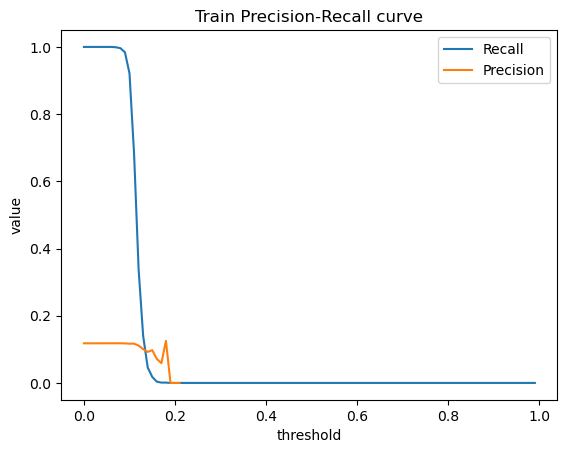

In [126]:
plt.plot(df_scores.threshold, df_scores.recall, label = 'Recall')
plt.plot(df_scores.threshold, df_scores.precision, label = 'Precision')
plt.ylabel("value")
plt.xlabel("threshold")
plt.title("Train Precision-Recall curve")
plt.legend()

In [127]:
df_scores.shape

(100, 3)

In [128]:
# #### code from google' Gemini


# precision = df_scores.recall.values
# recall = df_scores.precision.values

# # Threshold values
# thresholds = np.arange(0.0, 1, step = 0.01)

# # Find the intersection point
# intersection_index = np.argmin(abs(precision - recall))
# intersection_point = (thresholds[intersection_index], precision[intersection_index])

# # Plot the precision-recall curve
# plt.plot(thresholds, precision, label='Precision')
# plt.plot(thresholds, recall, label='Recall')
# plt.scatter(intersection_point[0], intersection_point[1], color='red', label='Intersection')

# # Annotate the intersection point
# plt.annotate(f'Intersection: ({intersection_point[0]:.2f}, {intersection_point[1]:.2f})',
#              xy=intersection_point, xytext=(10, 10), textcoords='offset points',
#              arrowprops=dict(arrowstyle="->"))

# plt.xlabel('Threshold')
# plt.ylabel('Value')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

#### Question 4

#### F1 Score

In [129]:
thresholds = np.arange(0.0, 1, step = 0.01)

f1_scores = []

for t in thresholds:
    #Actual values
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    #Prediction values
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp) 
    recall = tp / (tp + fn)
    
    #f1 score formula
    P_R = precision * recall
    P_P_R = precision + recall
    
    f1_score = 2* (P_R/P_P_R)
    
    f1_scores.append((t, precision, recall, f1_score))
    
    
scores

C:\Users\HP\AppData\Local\Temp\ipykernel_2476\3386545271.py:27: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2* (P_R/P_P_R)
C:\Users\HP\AppData\Local\Temp\ipykernel_2476\3386545271.py:20: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


[(0.0, 0.11789427117894272, 1.0),
 (0.01, 0.11790731113814844, 1.0),
 (0.02, 0.11790731113814844, 1.0),
 (0.03, 0.11792035398230089, 1.0),
 (0.04, 0.11793339971235756, 1.0),
 (0.05, 0.11795949983401571, 1.0),
 (0.06, 0.1179725542275343, 1.0),
 (0.07, 0.11800554016620499, 0.99906191369606),
 (0.08, 0.11793448084397556, 0.9962476547842402),
 (0.09, 0.1176668536174986, 0.9840525328330206),
 (0.1, 0.11684911946692052, 0.9212007504690432),
 (0.11, 0.11690186016677358, 0.6838649155722326),
 (0.12, 0.11121380160197165, 0.33864915572232646),
 (0.13, 0.10040431266846361, 0.1397748592870544),
 (0.14, 0.09227871939736347, 0.04596622889305816),
 (0.15, 0.09743589743589744, 0.017823639774859287),
 (0.16, 0.07142857142857142, 0.00375234521575985),
 (0.17, 0.058823529411764705, 0.0009380863039399625),
 (0.18, 0.125, 0.0009380863039399625),
 (0.19, 0.0, 0.0),
 (0.2, 0.0, 0.0),
 (0.21, 0.0, 0.0),
 (0.22, nan, 0.0),
 (0.23, nan, 0.0),
 (0.24, nan, 0.0),
 (0.25, nan, 0.0),
 (0.26, nan, 0.0),
 (0.27, nan,

In [130]:
columns = ['threshold', 'precision', 'recall', 'f1_score']
df_f1scores = pd.DataFrame(f1_scores, columns = columns)
    
df_f1scores

,threshold,precision,recall,f1_score
0,0.00,0.117894,1.0,0.210922
1,0.01,0.117907,1.0,0.210943
2,0.02,0.117907,1.0,0.210943
3,0.03,0.117920,1.0,0.210964
4,0.04,0.117933,1.0,0.210985
...,...,...,...,...
95,0.95,NaN,0.0,NaN
96,0.96,NaN,0.0,NaN
97,0.97,NaN,0.0,NaN
98,0.98,NaN,0.0,NaN


Text(0, 0.5, 'f1_score')

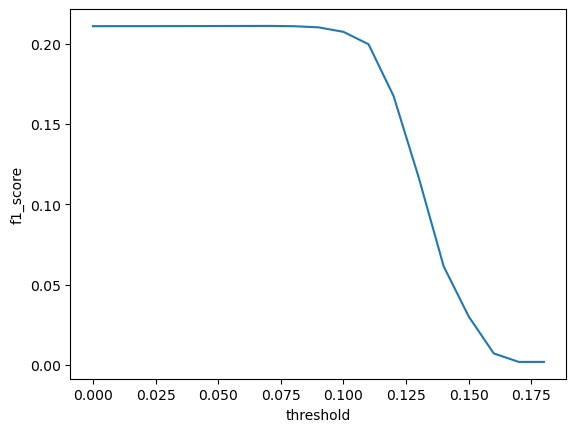

In [131]:
plt.plot(df_f1scores.threshold, df_f1scores.f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

####  F1_score is maximum at 0.02

### Question 5 kfold

In [132]:
from sklearn.model_selection import KFold

In [133]:
from tqdm.auto import tqdm

In [134]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [135]:
train_idx, val_idx = next(kfold.split(df_full_train))

len(df_full_train), len(train_idx), len(val_idx)

(36168, 28934, 7234)

In [136]:
# df_train = df_full_train.iloc[train_idx]
# df_val = df_full_train.iloc[val_idx]

In [137]:
kfoldscores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.y.values
    y_val = df_val.y.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    kfoldscores.append(auc)

0it [00:00, ?it/s]

In [138]:
kfoldscores

[0.8993883806356288,
 0.8989055268937651,
 0.9112102229960733,
 0.9080952264469403,
 0.9100912737695956]

In [139]:
print('%.3f +- %.3f' % (np.mean(kfoldscores), np.std(kfoldscores)))

0.906 +- 0.005


### Question 6

#### Hyperparameter Tuning

In [140]:
C = [0.000001, 0.001, 1]

n_splits = 5

for c in tqdm(C):
    scores = []
    
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C = c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C = %s %.3f +-%.3f' % (c, np.mean(scores), np.std(scores)))


  0%|          | 0/3 [00:00<?, ?it/s]

C = 1e-06 0.701 +-0.009
C = 0.001 0.861 +-0.007
C = 1 0.906 +-0.005


#### C = 1 leads to the best mean score